In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# EDA and Data Preparation

In [2]:
data = pd.read_csv("/Users/daniyahammarah/Downloads/DSMP/fake_transactional_data_24.csv")

In [3]:
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025


#### Renaming columns

In [4]:
data.rename(columns = {'from_totally_fake_account':'Sender_Account_Num', 'monopoly_money_amount':'Amount', 
                              'to_randomly_generated_account':'Receiver', 'not_happened_yet_date':'Transaction_date'}, inplace = True)


#### Converting Date col to Date Type

In [5]:
data["Transaction_date"] = pd.to_datetime(data.Transaction_date,format="%d/%m/%Y")
data["Transaction_Date"] = data['Transaction_date'].dt.strftime('%m/%d/%Y')
print(data['Transaction_date'])

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: Transaction_date, Length: 10148280, dtype: datetime64[ns]


In [6]:
data['Day_of_Week'] = data['Transaction_date'].dt.dayofweek
data['Month'] = data['Transaction_date'].dt.strftime('%B')
data['Week_of_Month'] = data['Transaction_date'].dt.day // 7 + 1
data


,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month
0,10371.0,4.00,CINEMA,2025-01-01,01/01/2025,2,January,1
1,88339.0,2.40,40544,2025-01-01,01/01/2025,2,January,1
2,18555.0,2.40,85149,2025-01-01,01/01/2025,2,January,1
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1
4,80792.0,1.95,18555,2025-01-01,01/01/2025,2,January,1
...,...,...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5
10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5
10148277,57569.0,14.00,WINE_BAR,2025-12-31,12/31/2025,2,December,5
10148278,1490.0,9.00,57569,2025-12-31,12/31/2025,2,December,5


#### Sender Accnt No. in INTEGER and extracting length of account number.

In [7]:
data['Sender_Account_Num'] = data['Sender_Account_Num'].astype(int)

data['Sender_Account_Num_Length'] = data['Sender_Account_Num'].astype(str).apply(lambda x: len(x))

unique_lengths = data['Sender_Account_Num_Length'].unique()
print(unique_lengths)

[5 4 6]


#### Receiver Accnt No. in INTEGER and extracting business names into new column.

In [8]:
data['Receiver_Account_Num'] = pd.to_numeric(data['Receiver'], errors='coerce')
mask = data['Receiver_Account_Num'].isna()
data.loc[mask, 'Receiver_Name'] = data.loc[mask, 'Receiver']

data['Receiver_Account_Num'] = data['Receiver_Account_Num'].fillna(0)

data['Receiver_Account_Num'] = data['Receiver_Account_Num'].astype(int)

data['Receiver_Account_Num_Length'] = data['Receiver_Account_Num'].astype(str).apply(lambda x: len(x))
data['Receiver_Name'] = data['Receiver_Name'].astype(str)

In [9]:
receiver_names = data['Receiver_Name'].drop_duplicates()
receiver_names.to_csv('receiver_names.csv', index=False)

receiver_nums = data['Receiver_Account_Num'].drop_duplicates()
receiver_nums.to_csv('receiver_nums.csv', index=False)

#### Data Type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 12 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Sender_Account_Num           int64         
 1   Amount                       float64       
 2   Receiver                     object        
 3   Transaction_date             datetime64[ns]
 4   Transaction_Date             object        
 5   Day_of_Week                  int32         
 6   Month                        object        
 7   Week_of_Month                int64         
 8   Sender_Account_Num_Length    int64         
 9   Receiver_Account_Num         int64         
 10  Receiver_Name                object        
 11  Receiver_Account_Num_Length  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 890.4+ MB


#### Unique values 

In [11]:
data.nunique()

Sender_Account_Num              8142
Amount                          5236
Receiver                       14300
Transaction_date                 364
Transaction_Date                 364
Day_of_Week                        7
Month                             12
Week_of_Month                      5
Sender_Account_Num_Length          3
Receiver_Account_Num           14222
Receiver_Name                     80
Receiver_Account_Num_Length        4
dtype: int64

In [12]:
data.shape[0]

10148280

#### Nulls

In [13]:
data.isnull().sum()

Sender_Account_Num             0
Amount                         0
Receiver                       0
Transaction_date               0
Transaction_Date               0
Day_of_Week                    0
Month                          0
Week_of_Month                  0
Sender_Account_Num_Length      0
Receiver_Account_Num           0
Receiver_Name                  0
Receiver_Account_Num_Length    0
dtype: int64

#### Data Stats

In [14]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Sender_Account_Num,10148280.0,50805.021701,1000.0,25304.0,50781.0,75633.0,100988.0,28937.100678
Amount,10148280.0,18.393485,1.45,2.65,6.0,12.0,1995.0,86.123232
Transaction_date,10148280,2025-07-02 20:10:40.958271744,2025-01-01 00:00:00,2025-04-02 00:00:00,2025-07-03 00:00:00,2025-10-04 00:00:00,2025-12-31 00:00:00,NaN
Day_of_Week,10148280.0,3.728669,0.0,2.0,4.0,5.0,6.0,1.897975
Week_of_Month,10148280.0,2.818001,1.0,2.0,3.0,4.0,5.0,1.291484
Sender_Account_Num_Length,10148280.0,4.920373,4.0,5.0,5.0,5.0,6.0,0.309151
Receiver_Account_Num,10148280.0,12785.606255,0.0,0.0,0.0,0.0,100988.0,26433.992868
Receiver_Account_Num_Length,10148280.0,1.979424,1.0,1.0,1.0,1.0,6.0,1.705149


#### checking the effect of dropping duplicates

In [15]:
data_drop = data.drop_duplicates() #cant drop duplicates, the dates are not timestamped
data_drop.shape[0]

8482106

#### marking duplicate rows

In [16]:
data['is_duplicate'] = data.duplicated(subset=['Sender_Account_Num', 'Receiver_Account_Num', 'Receiver_Name', 'Transaction_Date', 'Amount'], keep=False)

data_check = data
data_check.to_csv('data_check.csv', index=False)


#### checking if all receivers are also senders

In [17]:
unique_senders = set(data['Sender_Account_Num'])
unique_receivers = set(data['Receiver_Account_Num'])

common_account_numbers = unique_senders.intersection(unique_receivers)

num_common_account_numbers = len(common_account_numbers)

print("Number of sender account numbers also present as receiver account numbers:", num_common_account_numbers)

Number of sender account numbers also present as receiver account numbers: 8127


#### Extracting Receiver Account NAMES

In [18]:
receiver_names = data[data['Receiver'].str.isalpha()]['Receiver_Account_Num'].drop_duplicates()
# receiver_names = receiver_names[['Receiver_Account_Num']].drop_duplicates()

receiver_names.to_csv('receiver_names.csv', index=False)

In [19]:
receiver_nums = data[['Receiver_Account_Num']].drop_duplicates()

receiver_nums

receiver_nums.to_csv('receiver_num.csv', index=False)

#### Extracting month and year

In [20]:
data['Transaction_Month'] = data['Transaction_date'].dt.month
data['Transaction_Year'] = data['Transaction_date'].dt.year
data

,Sender_Account_Num,Amount,Receiver,Transaction_date,Transaction_Date,Day_of_Week,Month,Week_of_Month,Sender_Account_Num_Length,Receiver_Account_Num,Receiver_Name,Receiver_Account_Num_Length,is_duplicate,Transaction_Month,Transaction_Year
0,10371,4.00,CINEMA,2025-01-01,01/01/2025,2,January,1,5,0,CINEMA,1,False,1,2025
1,88339,2.40,40544,2025-01-01,01/01/2025,2,January,1,5,40544,nan,5,False,1,2025
2,18555,2.40,85149,2025-01-01,01/01/2025,2,January,1,5,85149,nan,5,False,1,2025
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,01/01/2025,2,January,1,5,0,HIPSTER_COFFEE_SHOP,1,False,1,2025
4,80792,1.95,18555,2025-01-01,01/01/2025,2,January,1,5,18555,nan,5,False,1,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148275,32185,2.65,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5,5,0,COFFEE_SHOP,1,False,12,2025
10148276,32185,2.45,COFFEE_SHOP,2025-12-31,12/31/2025,2,December,5,5,0,COFFEE_SHOP,1,False,12,2025
10148277,57569,14.00,WINE_BAR,2025-12-31,12/31/2025,2,December,5,5,0,WINE_BAR,1,False,12,2025
10148278,1490,9.00,57569,2025-12-31,12/31/2025,2,December,5,4,57569,nan,5,False,12,2025


In [21]:
data['Receiver_Account_Num'] = data['Receiver_Account_Num'].astype(int)

data['Receiver_Account_Num_Length'] = data['Receiver_Account_Num'].astype(str).apply(lambda x: len(x))

unique_lengths = data['Receiver_Account_Num_Length'].unique()
print(unique_lengths)

[1 5 4 6]


# CUSTOMER SEGMENTATION - RFM

In [22]:
today_date = datetime(2026, 1, 1)

rfm_data = data.groupby('Sender_Account_Num').agg({
    'Transaction_date': lambda x: (today_date - x.max()).days,
    'Receiver': 'count',
    'Amount': 'sum'
}).reset_index()

# Rename the columns for better understanding
rfm_data.rename(columns={
    'Transaction_date': 'Recency',
    'Receiver': 'Frequency',
    'Amount': 'Monetary'
}, inplace=True)

In [23]:
rfm_data['Recency'].unique()

array([1, 2, 5, 3, 4])

Once you have calculated the RFM scores for each customer, you can further analyze and segment the customers into different groups based on these scores. One common approach is to use quartiles to divide customers into segments:

Calculate Quartiles: Calculate quartiles for each RFM score to divide customers into four equal-sized groups (quartiles).
Assign RFM Scores: Assign a score of 1 to 4 to each customer based on which quartile they fall into for each RFM score (4 being the highest).
Combine RFM Scores: Combine the three individual RFM scores into a single RFM score (e.g., 4-4-4 for the highest quartile in each category).
Segment Customers: Segment customers into different groups based on their combined RFM scores.
Analyze Customer Segments: Analyze the characteristics and behavior of each customer segment to identify key insights and develop targeted marketing strategies.


In [24]:
# Assuming you have already calculated Recency, Frequency, and Monetary values

# Define quartiles for RFM values
quartiles = rfm_data[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Define functions to create RFM segments
def rfm_segment(row):
    if row['Recency'] <= quartiles['Recency'][0.25]:
        return '4'
    elif row['Recency'] <= quartiles['Recency'][0.50]:
        return '3'
    elif row['Recency'] <= quartiles['Recency'][0.75]:
        return '2'
    else:
        return '1'

def f_segment(row):
    if row['Frequency'] <= quartiles['Frequency'][0.25]:
        return '1'
    elif row['Frequency'] <= quartiles['Frequency'][0.50]:
        return '2'
    elif row['Frequency'] <= quartiles['Frequency'][0.75]:
        return '3'
    else:
        return '4'

def m_segment(row):
    if row['Monetary'] <= quartiles['Monetary'][0.25]:
        return '1'
    elif row['Monetary'] <= quartiles['Monetary'][0.50]:
        return '2'
    elif row['Monetary'] <= quartiles['Monetary'][0.75]:
        return '3'
    else:
        return '4'

# Apply segmentation functions
rfm_data['R'] = rfm_data.apply(rfm_segment, axis=1)
rfm_data['F'] = rfm_data.apply(f_segment, axis=1)
rfm_data['M'] = rfm_data.apply(m_segment, axis=1)

# Combine RFM scores into a single RFM score
rfm_data['rfm_score'] = rfm_data['R'].map(str) + rfm_data['F'].map(str) + rfm_data['M'].map(str)
rfm_data['rfm_score'] = rfm_data['rfm_score'].astype(int)


In [25]:
r = rfm_data['rfm_score'].unique()
print(sorted(r))

[111, 112, 113, 114, 121, 122, 123, 124, 131, 132, 133, 134, 141, 142, 143, 144, 411, 412, 413, 414, 421, 422, 423, 424, 431, 432, 433, 434, 441, 442, 443, 444]


In [26]:
rfm_scores = rfm_data['rfm_score'].unique()

# Sort the RFM scores in descending order
sorted_scores = sorted(rfm_scores, reverse=True)

# Calculate the number of customers in each segment
num_customers = len(rfm_scores)
num_high_importance = num_customers // 3
num_mid_importance = num_customers // 3

# Determine the segment boundaries
high_importance_cutoff = sorted_scores[num_high_importance - 1]
mid_importance_cutoff = sorted_scores[num_high_importance + num_mid_importance - 1]


customer_flags = pd.DataFrame({
    'rfm_score': rfm_scores,
    'importance_flag': ['High' if score >= high_importance_cutoff else
                        'Mid' if mid_importance_cutoff <= score < high_importance_cutoff else
                        'Low' for score in rfm_scores]
})

# Merge the original data with the customer importance flags
merged_data = rfm_data.merge(customer_flags, on='rfm_score', how='left')


In [27]:
num_high_importance

10

In [28]:
result1 = merged_data[['Sender_Account_Num','rfm_score','importance_flag']]

In [29]:
result1.shape[0]

8142

In [30]:
sorted_df = customer_flags.sort_values(by='rfm_score', ascending=True)
print(sorted_df)

sorted_df.to_csv('result1_rfmscore.csv', index=False)

    rfm_score importance_flag
3         111             Low
12        112             Low
27        113             Low
8         114             Low
19        121             Low
14        122             Low
24        123             Low
28        124             Low
16        131             Low
17        132             Low
26        133             Low
15        134             Low
30        141             Mid
23        142             Mid
29        143             Mid
31        144             Mid
5         411             Mid
20        412             Mid
13        413             Mid
18        414             Mid
1         421             Mid
7         422             Mid
22        423            High
21        424            High
25        431            High
4         432            High
9         433            High
10        434            High
6         441            High
2         442            High
0         443            High
11        444            High


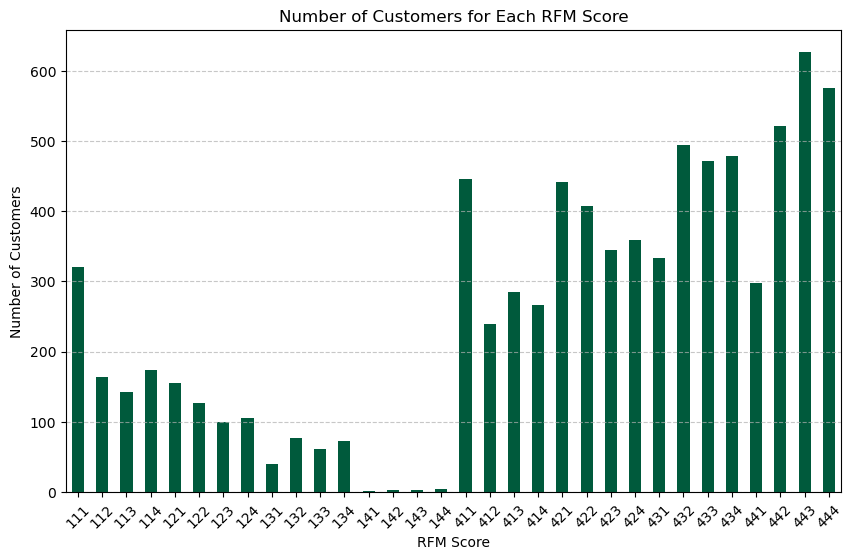

In [31]:
import matplotlib.pyplot as plt

# Count the number of customers for each RFM score
rfm_counts = rfm_data['rfm_score'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
rfm_counts.plot(kind='bar', color='#005A3C')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for Each RFM Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
result1
result1.to_csv('RFMresult1.csv', index=False)

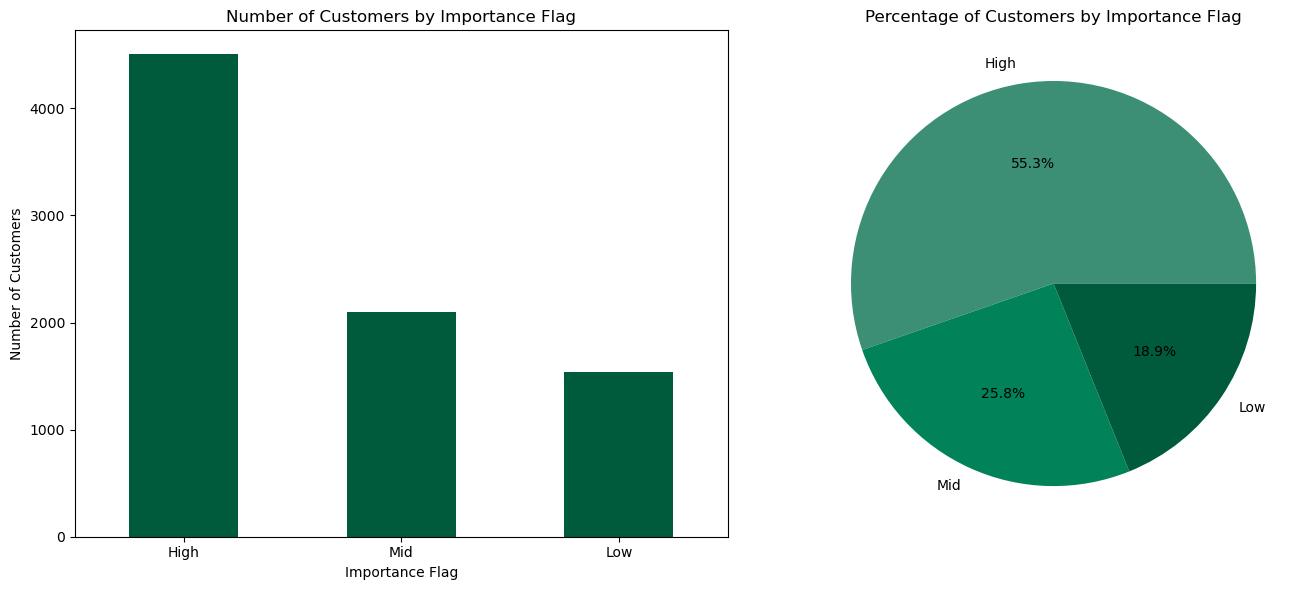

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

customer_counts1 = result1['importance_flag'].value_counts()


# Define colors using Lloyds Banking logo colors
colors = ['#3C8F74', '#028258', '#005A3C']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the bar plot
customer_counts1.plot(kind='bar', color='#005A3C', ax=axes[0])
axes[0].set_xlabel('Importance Flag')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Number of Customers by Importance Flag')
axes[0].tick_params(axis='x', rotation=0)

# Plot the pie chart
customer_counts1.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[1])
axes[1].set_ylabel('')  # Remove the ylabel for the pie chart
axes[1].set_title('Percentage of Customers by Importance Flag')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
customer_counts1

importance_flag
High    4504
Mid     2099
Low     1539
Name: count, dtype: int64

# SECOND APPROACH

In [35]:


# Define quartiles for RFM values
unique_recency_values = rfm_data['Recency'].unique()
# Create a new DataFrame with the unique recency values
recency_df = pd.DataFrame({'Recency': unique_recency_values})


quartiles = rfm_data[['Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])
quartiles_R = recency_df[['Recency']].quantile([0.25, 0.5, 0.75])

# Define functions to create RFM segments
def rfm_segment(row):
    if row['Recency'] <= quartiles_R['Recency'][0.25]:
        return '4'
    elif row['Recency'] <= quartiles_R['Recency'][0.50]:
        return '3'
    elif row['Recency'] <= quartiles_R['Recency'][0.75]:
        return '2'
    else:
        return '1'

def f_segment(row):
    if row['Frequency'] <= quartiles['Frequency'][0.25]:
        return '1'
    elif row['Frequency'] <= quartiles['Frequency'][0.50]:
        return '2'
    elif row['Frequency'] <= quartiles['Frequency'][0.75]:
        return '3'
    else:
        return '4'

def m_segment(row):
    if row['Monetary'] <= quartiles['Monetary'][0.25]:
        return '1'
    elif row['Monetary'] <= quartiles['Monetary'][0.50]:
        return '2'
    elif row['Monetary'] <= quartiles['Monetary'][0.75]:
        return '3'
    else:
        return '4'

# Apply segmentation functions
# Using copy() method
rfm_data2 = rfm_data.copy()



rfm_data2['R'] = rfm_data2.apply(rfm_segment, axis=1)
rfm_data2['F'] = rfm_data2.apply(f_segment, axis=1)
rfm_data2['M'] = rfm_data2.apply(m_segment, axis=1)

# Combine RFM scores into a single RFM score
rfm_data2['rfm_score'] = rfm_data2['R'].map(str) + rfm_data2['F'].map(str) + rfm_data2['M'].map(str)
rfm_data2['rfm_score'] = rfm_data2['rfm_score'].astype(int)


In [36]:
rfm_data2['rfm_score'].unique()

array([443, 421, 442, 411, 432, 441, 422, 414, 433, 434, 444, 112, 413,
       431, 332, 211, 412, 424, 423, 321, 311, 212, 214, 222, 333, 213,
       322, 323, 312, 324, 314, 221, 234, 313, 334, 223, 232, 231, 331,
       224, 122, 111])

In [37]:
rfm_scores2 = rfm_data2['rfm_score'].unique()

# Sort the RFM scores in descending order
sorted_scores = sorted(rfm_scores2, reverse=True)

# Calculate the number of customers in each segment
num_customers2 = len(rfm_scores2)
num_high_importance2 = num_customers2 // 3
num_mid_importance2 = num_customers2 // 3

# Determine the segment boundaries
high_importance_cutoff2 = sorted_scores[num_high_importance2 - 1]
mid_importance_cutoff2 = sorted_scores[num_high_importance2 + num_mid_importance2 - 1]


customer_flags2 = pd.DataFrame({
    'rfm_score': rfm_scores2,
    'importance_flag': ['High' if score >= high_importance_cutoff2 else
                        'Mid' if mid_importance_cutoff2 <= score < high_importance_cutoff2 else
                        'Low' for score in rfm_scores2]
})

merged_data2 = rfm_data2.merge(customer_flags2, on='rfm_score', how='left')

In [38]:
num_mid_importance2

14

In [39]:
result2 = merged_data2[['Sender_Account_Num','rfm_score','importance_flag']]

In [40]:
result2

,Sender_Account_Num,rfm_score,importance_flag
0,1000,443,High
1,1002,421,High
2,1006,442,High
3,1018,411,Mid
4,1053,432,High
...,...,...,...
8137,100931,443,High
8138,100934,422,High
8139,100947,442,High
8140,100986,421,High


In [41]:
result2
result2.to_csv('RFMresult2.csv', index=False)

In [42]:
sorted_df2 = customer_flags2.sort_values(by='rfm_score', ascending=True)
print(sorted_df2)

sorted_df2.to_csv('result2_rfmscore.csv', index=False)

    rfm_score importance_flag
41        111             Low
11        112             Low
40        122             Low
15        211             Low
21        212             Low
25        213             Low
22        214             Low
31        221             Low
23        222             Low
35        223             Low
39        224             Low
37        231             Low
36        232             Low
32        234             Low
20        311             Mid
28        312             Mid
33        313             Mid
30        314             Mid
19        321             Mid
26        322             Mid
27        323             Mid
29        324             Mid
38        331             Mid
14        332             Mid
24        333             Mid
34        334             Mid
3         411             Mid
16        412             Mid
12        413            High
7         414            High
1         421            High
6         422            High
18        

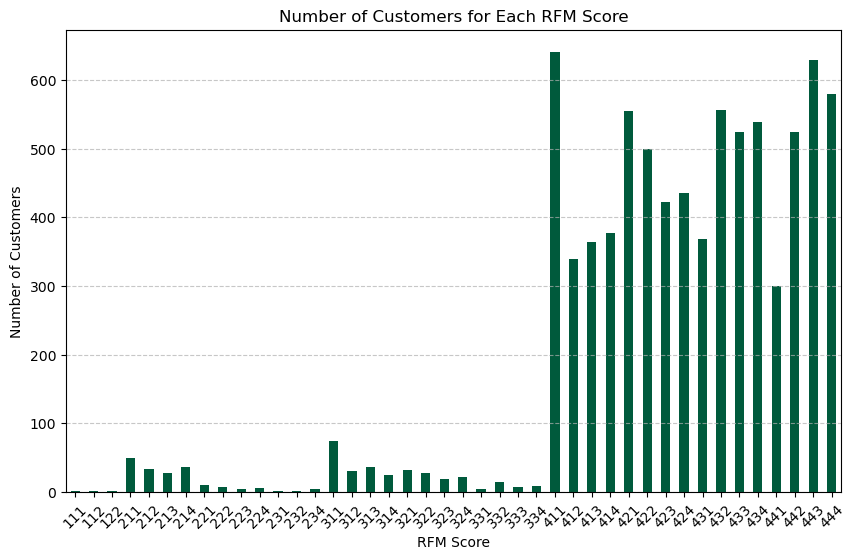

In [43]:
import matplotlib.pyplot as plt

# Count the number of customers for each RFM score
rfm_counts = rfm_data2['rfm_score'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
rfm_counts.plot(kind='bar', color='#005A3C')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for Each RFM Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


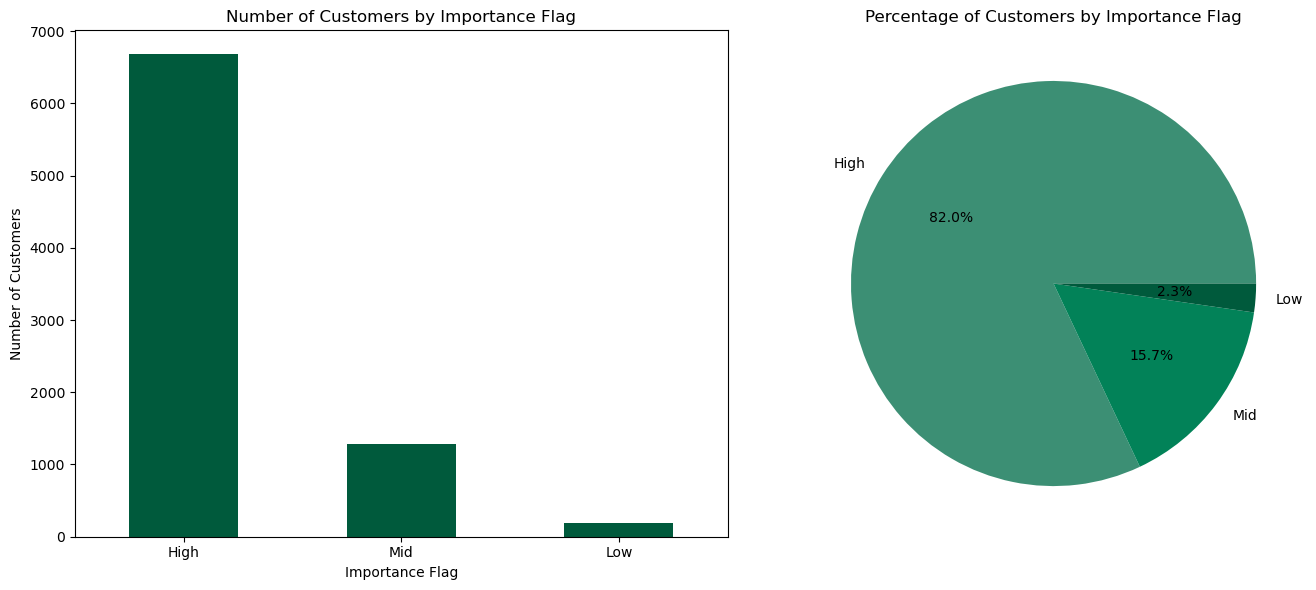

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

customer_counts2 = result2['importance_flag'].value_counts()

# Define colors using Lloyds Banking logo colors
colors = ['#3C8F74', '#028258', '#005A3C']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the bar plot
customer_counts2.plot(kind='bar', color='#005A3C', ax=axes[0])
axes[0].set_xlabel('Importance Flag')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Number of Customers by Importance Flag')
axes[0].tick_params(axis='x', rotation=0)

# Plot the pie chart
customer_counts2.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[1])
axes[1].set_ylabel('')  # Remove the ylabel for the pie chart
axes[1].set_title('Percentage of Customers by Importance Flag')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
customer_counts2

importance_flag
High    6677
Mid     1279
Low      186
Name: count, dtype: int64

In [46]:
result2

,Sender_Account_Num,rfm_score,importance_flag
0,1000,443,High
1,1002,421,High
2,1006,442,High
3,1018,411,Mid
4,1053,432,High
...,...,...,...
8137,100931,443,High
8138,100934,422,High
8139,100947,442,High
8140,100986,421,High


In [47]:
customers_by_recency2 = rfm_data2.groupby('rfm_score').size()
customers_by_recency2

rfm_score
111      1
112      2
122      1
211     50
212     33
213     28
214     37
221     10
222      7
223      4
224      6
231      1
232      2
234      4
311     74
312     30
313     36
314     25
321     32
322     27
323     19
324     22
331      4
332     14
333      7
334      9
411    641
412    339
413    364
414    378
421    555
422    500
423    422
424    436
431    368
432    556
433    525
434    539
441    300
442    524
443    630
444    580
dtype: int64

# K means

In [48]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Select features for segmentation (Recency, Frequency, Monetary)
# rfm_data_subset = rfm_data[['Recency', 'Frequency', 'Monetary']]

# # Standardize the data
# rfm_data_scaled = (rfm_data_subset - rfm_data_subset.mean()) / rfm_data_subset.std()

# # Determine the optimal number of clusters using the elbow method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(rfm_data_scaled)
#     wcss.append(kmeans.inertia_)

# # Plot the elbow method graph
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

In [49]:
# # Based on the elbow method, choose the number of clusters (e.g., 3)
# n_clusters = 3

# # Perform k-means clustering
# kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
# rfm_data['Segment'] = kmeans.fit_predict(rfm_data_scaled)

# # Visualize the clusters
# fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
#     ax[i].scatter(rfm_data[feature], rfm_data['Segment'], c=rfm_data['Segment'], cmap='viridis', alpha=0.7)
#     ax[i].set_xlabel(feature)
#     ax[i].set_ylabel('Segment')
#     ax[i].set_title(f'Segmentation based on {feature}')
# plt.tight_layout()
# plt.show()

In [50]:


# unique_rows = rfm_data[['rfm_score', 'Segment']].drop_duplicates().sort_values(by='rfm_score')
# print(unique_rows)


In [60]:
categorical_result = pd.read_csv("/Users/daniyahammarah/Downloads/Transactional_data_categorical_labels.csv")

categorical_result

c_result = categorical_result[['Sender account','cluster_label']]

c_result.rename(columns = {'Sender account':'Sender_Account_Num'}, inplace = True)


In [61]:
c_result

,Sender_Account_Num,cluster_label
0,1000.0,0
1,1002.0,1
2,1006.0,2
3,1018.0,2
4,1053.0,3
...,...,...
8137,100931.0,5
8138,100934.0,7
8139,100947.0,7
8140,100986.0,5


In [62]:
rfm_result = merged_data[['Sender_Account_Num','R',	'F',	'M','importance_flag']]
rfm_result

,Sender_Account_Num,R,F,M,importance_flag
0,1000,4,4,3,High
1,1002,4,2,1,Mid
2,1006,4,4,2,High
3,1018,1,1,1,Low
4,1053,4,3,2,High
...,...,...,...,...,...
8137,100931,4,4,3,High
8138,100934,1,2,2,Low
8139,100947,4,4,2,High
8140,100986,4,2,1,Mid


In [63]:
combo_result = rfm_result.merge(c_result, on='Sender_Account_Num', how='left')
combo_result

,Sender_Account_Num,R,F,M,importance_flag,cluster_label
0,1000,4,4,3,High,0
1,1002,4,2,1,Mid,1
2,1006,4,4,2,High,2
3,1018,1,1,1,Low,2
4,1053,4,3,2,High,3
...,...,...,...,...,...,...
8137,100931,4,4,3,High,5
8138,100934,1,2,2,Low,7
8139,100947,4,4,2,High,7
8140,100986,4,2,1,Mid,5
